
<div style=" padding: 40px; text-align: center; color: #8e44ad;text-shadow: 2px 2px 0px #f1c40f; ">
    <h1 style="font-family: 'Roboto', sans-serif;ext-align: center;  font-size: 72px; margin-top: 0; margin-bottom: 20px;">
    Statistics
    </h1>
</div>

<div style=" padding: 40px; text-align: center; color: #8e44ad;text-shadow: 2px 2px 0px #f1c40f; ">
    <h1 style="font-family: 'Roboto', sans-serif;ext-align: center;  font-size: 72px; margin-top: 0; margin-bottom: 20px;">
    Exercise 6
    </h1>
</div>

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">
MobileGame A/B Testing 
</p>


<br>

<!-- <div style="text-align:center;">
<img  src="air.png">
</div> -->




<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">

Summary
This notebook analyzes the data form an A/B test conducted on Cookie Cats, a mobile connect-three-style puzzle game. The null hypothesis significance tests show the original version has better retention rates than the tested version does. The notebook is written in Python and the libraries used are Pandas, Numpy, Matplotlib, and Seaborn.

Work Flow
Define the business problem
Detect potential problems (e.g. outliers, missing values, out-of-range/categoory date, etc.) and fix them
Conduct Exploratory Data Analysis (EDA)
Formulate Hypothesis
Simulate the hypothesis
Infer from the results and give business recommendationsere successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.





<div style="align:center">


    
    
Data dictionary:

1. "userid": This column gives unique IDs of users. Each row of the dataset is assigned to a specific user and placed in this column.

2. ``Version'': This column shows the version of the mobile game. There are two versions of the game called "gate30" and "gate40" by which users are divided into two groups. These groups differ in the way they display ads.

3. `sum_gamerounds`: This column shows the number of times each user (each row) has played the mobile game. In other words, this column shows how many times each user participated in the set of games.

4. `retention_1`: This column shows whether each user is still active after 1 day of installing the game. A value of 1 in this column indicates that the user is still active, and a value of 0 indicates that the user has been deactivated.

5. `retention_7`: This column works the same as the `retention_1` column, except that it shows whether the user is still active after 7 days of installing the game.

</div>

</p>   

    

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats


<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [3]:
df = pd.read_csv('/kaggle/input/mibilegame/mibilegame.csv')

In [4]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [5]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  90189
Number of columns:  5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [7]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [9]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [10]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 Data Cleaning</p>

In [11]:
df.isnull().any()

userid            False
version           False
sum_gamerounds    False
retention_1       False
retention_7       False
dtype: bool

In [12]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>

In [13]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

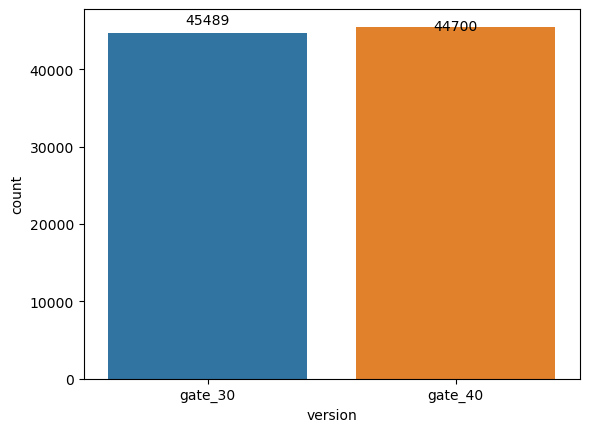

In [14]:
# رسم نمودار countplot
sns.countplot(data=df, x='version')

# محاسبه تعداد دقیق هر دسته‌بندی
counts = df['version'].value_counts()

# اضافه کردن عدد دقیق به عنوان متن بالای هر ستون
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

# نمایش نمودار
plt.show()

In [15]:
df.groupby('version')['sum_gamerounds'].mean()

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

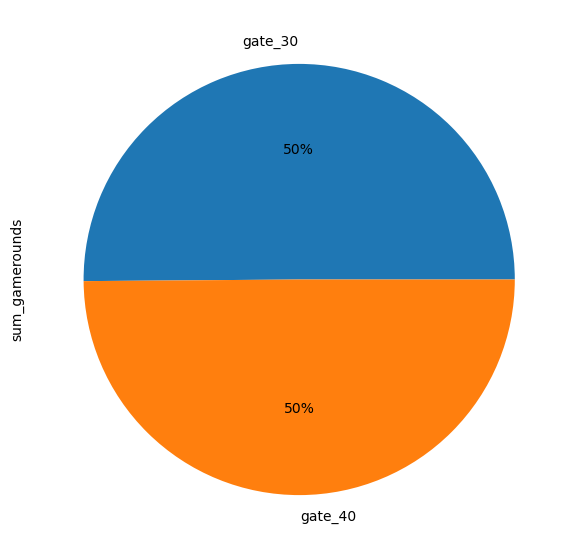

In [16]:
convertedgroup = df.groupby('version').sum()['sum_gamerounds'].plot.pie(figsize=(7,7),autopct='%1.0f%%')
plt.show()

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Normal </p>

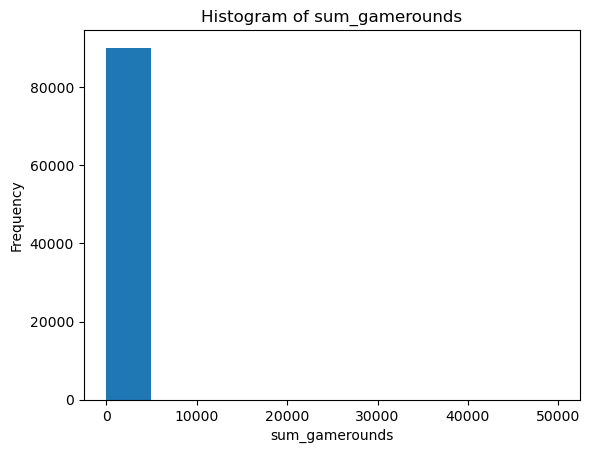

Shapiro-Wilk test statistic: 0.14405560493469238
Shapiro-Wilk test p-value: 0.0


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
# رسم هیستوگرام داده‌های ستون "sum_gamerounds"
plt.hist(df['sum_gamerounds'])
plt.title('Histogram of sum_gamerounds')
plt.xlabel('sum_gamerounds')
plt.ylabel('Frequency')
plt.show()

# اعمال تست شاپیرو-ویلک
stat, p = shapiro(df['sum_gamerounds'])
print('Shapiro-Wilk test statistic:', stat)
print('Shapiro-Wilk test p-value:', p)

<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">U  Test </p>

In [18]:
df['sum_gamerounds'].mean()

51.8724567297564

In [19]:
gate_30 = df.query('version == "gate_30"')
gate_40 = df.query('version == "gate_40"') 

In [20]:
gate_30['sum_gamerounds'].mean() 

52.45626398210291

In [21]:
gate_40['sum_gamerounds'].mean() 

51.29877552814966

In [22]:
d = gate_40['sum_gamerounds'].mean()  - gate_30['sum_gamerounds'].mean() 
d

-1.157488453953249




<div class="alert alert-block alert-info ;"> 📌  با توجه به نتایج تبلیغات باعث افزایش فروش نشده است . حال از لحاظ آماری هم برسی می کنیم ؟ </div>




<div class="alert alert-block alert-info ;"> 📌 According to the results, it did not increase sales. Shall we check the statistics? </div>





In [26]:
from scipy.stats import mannwhitneyu

# جداسازی دو گروه
group_1 = df.query('version == "gate_30"')['sum_gamerounds']
group_2 = df.query('version == "gate_40"')['sum_gamerounds']

# اجرای تست Mann-Whitney U
statistic, pvalue = mannwhitneyu(group_1, group_2)

print('Mann-Whitney U test results:')
print(f'Statistic: {statistic:.2f}')
print(f'p-value: {pvalue:.3f}')

Mann-Whitney U test results:
Statistic: 1024331250.50
p-value: 0.050


<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> END </p>